In [1]:
from data_reading import *

In [2]:
lep_author_data['AUTHOR'] = lep_author_data['AuthorLastname'] + ' ' + lep_author_data['AuthorInitials']
#ipd.display(lep_author_data)

In [3]:
lep_first = lep_author_data[lep_author_data['AuthorN'] == 1]
lep_first_count = lep_first['AUTHOR'].value_counts().reset_index()
lep_first_count.columns = ['Author', 'Count']

lep_other = lep_author_data[lep_author_data['AuthorN'] != 1]
lep_other_count = lep_other['AUTHOR'].value_counts().reset_index()
lep_other_count.columns = ['Author', 'Count']

merged_lep = pd.merge(lep_first_count, lep_other_count, on='Author', how='outer', suffixes=(' First', ' Other')).fillna(0)
merged_lep['Count Sum'] = merged_lep['Count First'] + merged_lep['Count Other']

lep_descending = merged_lep.sort_values(by=['Count Sum'], 
                                        ascending = False, 
                                        ignore_index = True)

lep_top10 = lep_descending.iloc[:10,:]

ipd.display(lep_top10)

,Author,Count First,Count Other,Count Sum
0,Ko AI,1.0,85.0,86.0
1,Picardeau M,6.0,72.0,78.0
2,Lilenbaum W,6.0,71.0,77.0
3,Dellagostin OA,1.0,59.0,60.0
4,Reis MG,0.0,57.0,57.0
5,Vasconcellos SA,0.0,56.0,56.0
6,Hartskeerl RA,2.0,54.0,56.0
7,Koizumi N,14.0,42.0,56.0
8,Costa F,5.0,36.0,41.0
9,Goarant C,4.0,37.0,41.0


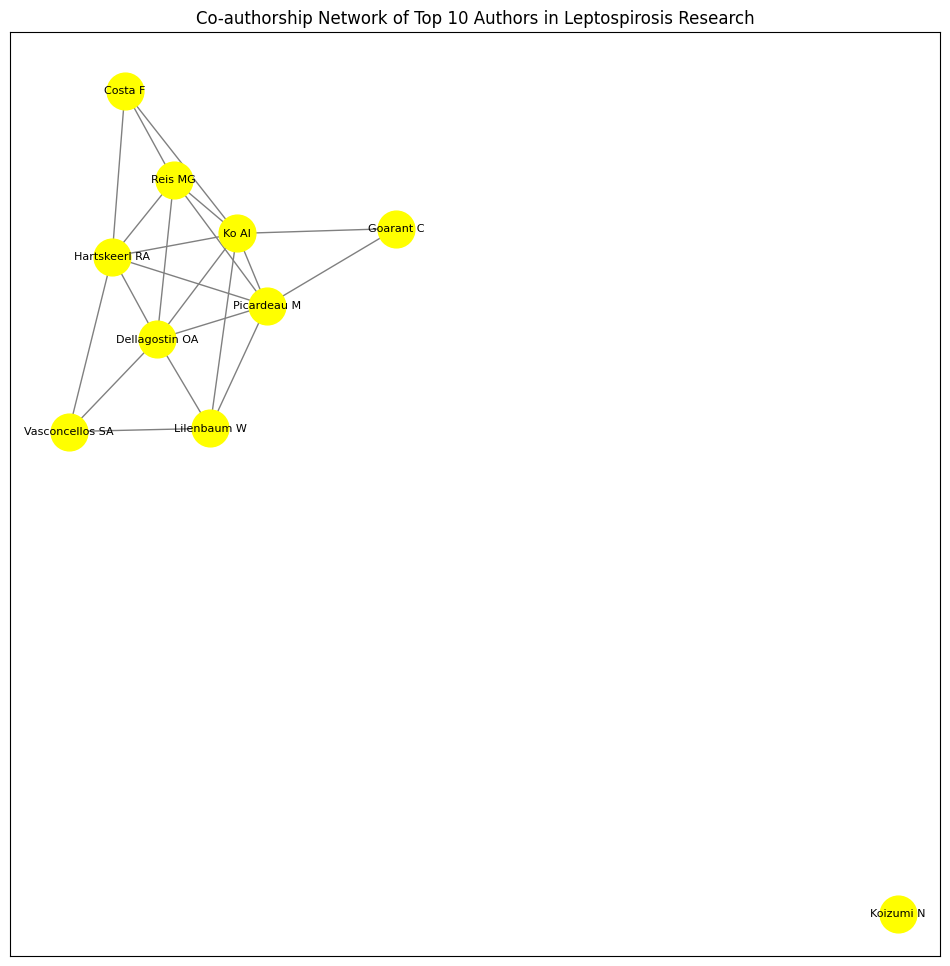

In [4]:
import networkx as nx
import matplotlib.pyplot as plt

# Extracting the top 10 authors
top_authors = lep_top10['Author'].tolist()

# Filtering the dataset to include only publications that involve at least one of the top authors
filtered_authors_data = lep_author_data[lep_author_data['AUTHOR'].isin(top_authors)]

# Grouping by publication and creating a list of authors for each publication
grouped_data = filtered_authors_data.groupby('PMID')['AUTHOR'].apply(list)

# Creating a graph
G = nx.Graph()

# Adding nodes and edges based on co-authorship
for authors in grouped_data:
    for author in authors:
        if author not in G:
            G.add_node(author)
        for co_author in authors:
            if author != co_author:
                G.add_edge(author, co_author)

# Drawing the network graph
plt.figure(figsize=(12, 12))
nx.draw_networkx(G, with_labels=True, node_color='yellow', font_size=8, node_size=700, edge_color='gray')
plt.title("Co-authorship Network of Top 10 Authors in Leptospirosis Research")
plt.show()
